In [5]:
#Fetching and reading CSV files
import pandas as pd

file1 = 'CSV/features.csv'
file2 = 'CSV/train.csv'

full_table1 = pd.read_csv(file1)
full_table2 = pd.read_csv(file2)

print(full_table1.columns)
print(full_table2.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [6]:
#Merging tables
merged_data = pd.merge(full_table1, full_table2, on=["Store", "Date", "IsHoliday"])
print(merged_data.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2   
0      1  05/02/2010        42.31       2.572        NaN        NaN  \
1      1  05/02/2010        42.31       2.572        NaN        NaN   
2      1  05/02/2010        42.31       2.572        NaN        NaN   
3      1  05/02/2010        42.31       2.572        NaN        NaN   
4      1  05/02/2010        42.31       2.572        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Dept   
0        NaN        NaN        NaN  211.096358         8.106      False     1  \
1        NaN        NaN        NaN  211.096358         8.106      False     2   
2        NaN        NaN        NaN  211.096358         8.106      False     3   
3        NaN        NaN        NaN  211.096358         8.106      False     4   
4        NaN        NaN        NaN  211.096358         8.106      False     5   

   Weekly_Sales  
0      24924.50  
1      50605.27  
2      13740.12  
3      39954.0

In [7]:
#Creating a new data frame with only desired variables
desired_vars = {
    "Date":merged_data['Date'],
    "Weekly_Sales": merged_data["Weekly_Sales"],
    "Temperature": merged_data["Temperature"],
    "Fuel_Price": merged_data["Fuel_Price"],
    "IsHoliday": merged_data["IsHoliday"]
}

data_table = pd.DataFrame(desired_vars)
print(data_table.head())

         Date  Weekly_Sales  Temperature  Fuel_Price  IsHoliday
0  05/02/2010      24924.50        42.31       2.572      False
1  05/02/2010      50605.27        42.31       2.572      False
2  05/02/2010      13740.12        42.31       2.572      False
3  05/02/2010      39954.04        42.31       2.572      False
4  05/02/2010      32229.38        42.31       2.572      False


In [8]:
#Splitting data
train_data = data_table[data_table["Date"] < "2012-01-01"]
test_data = data_table[data_table["Date"] >= "2012-01-01"]

# Convert IsHoliday bool type to int
train_data["IsHoliday"] = train_data["IsHoliday"].astype(int)
test_data["IsHoliday"] = test_data["IsHoliday"].astype(int)

# Convert exogenous variables to float type
exog_vars = ["Temperature", "Fuel_Price", "IsHoliday"]
train_data[exog_vars] = train_data[exog_vars].astype(float)
test_data[exog_vars] = test_data[exog_vars].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_25820\3385766918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["IsHoliday"] = train_data["IsHoliday"].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_25820\3385766918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["IsHoliday"] = test_data["IsHoliday"].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_25820\3385766918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[["Weekly_Sales"]])
test_scaled = scaler.transform(test_data[["Weekly_Sales"]])

In [10]:
# Prepare the data for LSTM
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 12  # Number of previous time steps to consider

X_train, y_train = prepare_data(train_scaled, window_size)
X_test, y_test = prepare_data(test_scaled, window_size)

In [14]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
#Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
#Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
8756/8756 [==============================] - 23s 2ms/step - loss: 0.0039
Epoch 2/10
8756/8756 [==============================] - 22s 2ms/step - loss: 0.0026
Epoch 3/10
8756/8756 [==============================] - 22s 2ms/step - loss: 0.0018
Epoch 4/10
8756/8756 [==============================] - 22s 2ms/step - loss: 0.0014
Epoch 5/10
8756/8756 [==============================] - 21s 2ms/step - loss: 0.0012
Epoch 6/10
8756/8756 [==============================] - 21s 2ms/step - loss: 0.0011
Epoch 7/10
8756/8756 [==============================] - 21s 2ms/step - loss: 0.0010
Epoch 8/10
8756/8756 [==============================] - 21s 2ms/step - loss: 9.5033e-04
Epoch 9/10
8756/8756 [==============================] - 21s 2ms/step - loss: 9.0241e-04
Epoch 10/10
8756/8756 [==============================] - 21s 2ms/step - loss: 8.6129e-04


In [16]:
#Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

4418/4418 [==============================] - 5s 1ms/step


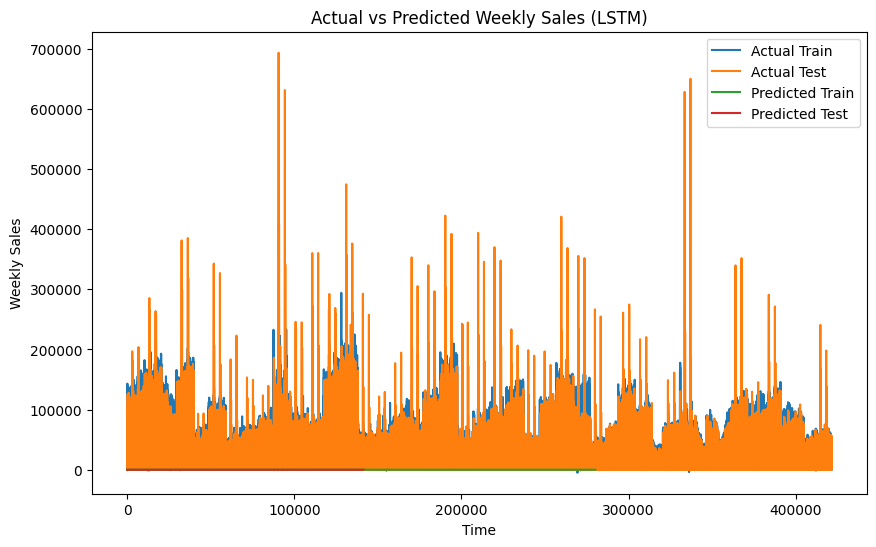

In [17]:
import matplotlib.pyplot as plt

#Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data["Weekly_Sales"], label="Actual Train")
plt.plot(test_data["Weekly_Sales"], label="Actual Test")
plt.plot(range(window_size, len(train_predictions) + window_size), train_predictions, label="Predicted Train")
plt.plot(range(window_size, len(test_predictions) + window_size), test_predictions, label="Predicted Test")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales (LSTM)")
plt.show()

In [18]:
#Creation of the SARIMAX model
import statsmodels.api as sm

#Define exogenous variables
exog_vars = ["Temperature", "Fuel_Price", "IsHoliday"]

#Create SARIMAX model
model = sm.tsa.SARIMAX(train_data["Weekly_Sales"], exog=train_data[exog_vars],
                       order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

#Fit the model
results = model.fit()

#Print the model summary
print(results.summary())

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:               280198
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood            -3207914.986
Date:                            Tue, 23 May 2023   AIC                        6415845.972
Time:                                    03:45:06   BIC                        6415930.317
Sample:                                         0   HQIC                       6415870.439
                                         - 280198                                         
Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature   -57.3380     14.178     -4.044      0.000     -85.126     -29.549
Fuel_Price   5690.2425    767.42

In [19]:
#Check for missing values in test_data
print(test_data.isnull().sum())

#Fill missing values with appropriate method
test_data_filled = test_data.fillna(method='ffill')  # Forward-fill missing values

#Verify if there are still missing values
print(test_data_filled.isnull().sum())

Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
IsHoliday       0
dtype: int64
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
IsHoliday       0
dtype: int64


In [23]:
#Generate forecasts
forecast = results.get_forecast(steps=len(test_data), exog=test_data[exog_vars])

#Generate predicted mean
forecasted_values = forecast.predicted_mean

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
#Getting RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

actual_values = test_data["Weekly_Sales"]
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
print("RMSE:", rmse)

RMSE: 31405.272060882235


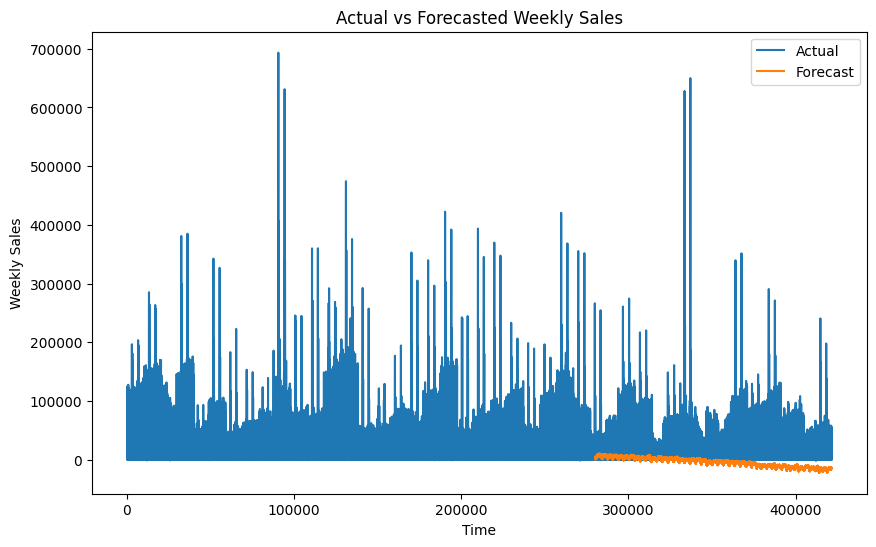

In [27]:
#Generating plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual")
plt.plot(forecasted_values, label="Forecast")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Weekly Sales")
plt.title("Actual vs Forecasted Weekly Sales")
plt.show()
